- [data](https://drive.google.com/drive/u/1/folders/0B0K4UUEpgZZyTzJST2pYWm5UYTA)

In [1]:
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import datasets

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
logistic = LogisticRegression(solver="newton-cg", 
                              multi_class="multinomial", 
                              verbose=True,
                              max_iter=5000)
pca = PCA()
normalize = Normalizer(norm='l2')
pipeline1 = Pipeline(steps=[("pca", pca), 
                            ("model", logistic)])
pipeline2 = Pipeline(steps=[("normalize", normalize), 
                            ("pca", pca), 
                            ("model", logistic)])

In [3]:
print("pipeline 1")
for i, (name, step) in enumerate(pipeline1.named_steps.items(), 1):
    print(i, name, step)
    print()
    
print("pipeline 2")
for i, (name, step) in enumerate(pipeline2.named_steps.items(), 1):
    print(i, name, step)
    print()

pipeline 1
1 pca PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

2 model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=True, warm_start=False)

pipeline 2
1 normalize Normalizer(copy=True, norm='l2')

2 pca PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

3 model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=True, warm_start=False)



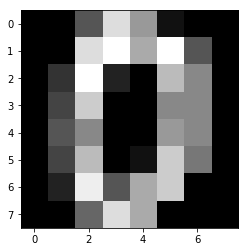

In [4]:
digits = datasets.load_digits()
X = digits.data
Y = digits.target

plt.imshow(X[0].reshape((8, 8)), cmap="gray", interpolation=None)

In [5]:
N = X.shape[0]
mask = np.random.binomial(1, 0.8, N) == 1

In [6]:
mask

array([ True,  True, False, ...,  True,  True,  True], dtype=bool)

In [7]:
X_test = X[~mask]
Y_test = Y[~mask]
X = X[mask]
Y = Y[mask]

In [8]:
X.shape, X_test.shape

((1421, 64), (376, 64))

In [9]:
X_norm = normalize.fit_transform(X)

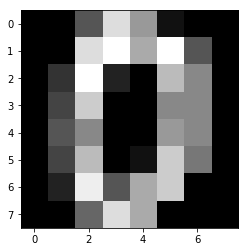

In [10]:
plt.imshow(X_norm[0].reshape((8, 8)), cmap="gray", interpolation=None)

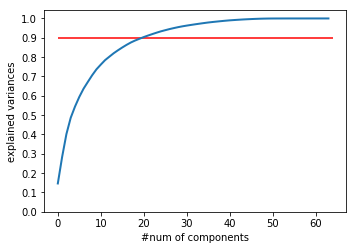

In [11]:
# pca plot
pca.fit(X)
plt.axes([.2, .2, .7, .7])
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.hlines(0.9, 0.0, pca.n_components_, colors='r')
plt.axis('tight')
plt.xlabel('#num of components')
plt.ylabel('explained variances')
_ = plt.yticks(np.arange(0.0, 1.1, 0.1))

In [12]:
pipeline1.fit(X, Y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=True, warm_start=False))])

In [13]:
# grid search
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 5)
print("n_components:", n_components)
print("Cs:", Cs)

estimator1 = GridSearchCV(pipeline1,
                         {"pca__n_components": n_components,
                         "model__C": Cs})
estimator1.fit(X, Y)
best_model1 = estimator1.best_estimator_
print(best_model1)

n_components: [20, 40, 64]
Cs: [  1.00000000e-04   1.00000000e-02   1.00000000e+00   1.00000000e+02
   1.00000000e+04]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=True, warm_start=False))])


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [14]:
best_model1.named_steps["pca"].n_components_

40

In [15]:
best_model1.named_steps["model"].C

0.01

In [16]:
best_pca1 = best_model1.named_steps["pca"]
np.cumsum(best_pca1.explained_variance_ratio_)[-1]

0.98824363441045115

In [17]:
def accuracy(y, y_):
    return (y == y_).mean()

In [18]:
Y_ = best_model1.predict(X_test)

In [19]:
print("accuracy: {:.2f}%".format(accuracy(Y_test, Y_)*100))

accuracy: 97.61%


In [20]:
estimator2 = GridSearchCV(pipeline2,
                         {"pca__n_components": n_components,
                         "model__C": Cs})
estimator2.fit(X, Y)
best_model2 = estimator2.best_estimator_
print(best_model2)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

Pipeline(memory=None,
     steps=[('normalize', Normalizer(copy=True, norm='l2')), ('pca', PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=True, warm_start=False))])


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [21]:
Y_ = best_model2.predict(X_test)
print("accuracy: {:.2f}%".format(accuracy(Y_, Y_test)*100))

accuracy: 97.87%
